* school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
* sex - student's sex (binary: 'F' - female or 'M' - male)
* age - student's age (numeric: from 15 to 22)
* address - student's home address type (binary: 'U' - urban or 'R' - rural)
* famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
* Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
* Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
* Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
* guardian - student's guardian (nominal: 'mother', 'father' or 'other')
* traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
* studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* failures - number of past class failures (numeric: n if 1<=n<3, else 4)
* schoolsup - extra educational support (binary: yes or no)
* famsup - family educational support (binary: yes or no)
* paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* activities - extra-curricular activities (binary: yes or no)
* nursery - attended nursery school (binary: yes or no)
* higher - wants to take higher education (binary: yes or no)
* internet - Internet access at home (binary: yes or no)
* romantic - with a romantic relationship (binary: yes or no)
* famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* freetime - free time after school (numeric: from 1 - very low to 5 - very high)
* goout - going out with friends (numeric: from 1 - very low to 5 - very high)
* Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* health - current health status (numeric: from 1 - very bad to 5 - very good)
* absences - number of school absences (numeric: from 0 to 93)


* G1 - first period grade (numeric: from 0 to 20)
* G2 - second period grade (numeric: from 0 to 20)
* G3 - final grade (numeric: from 0 to 20, output target)

## Erzeuge einen DataFrame aus `student-math.csv`

In [1]:
import pandas as pd

In [2]:
# Fabian Oppermann
# Doc: https://pandas.pydata.org/docs/user_guide/10min.html#basic-data-structures-in-pandas
# Parameter: Path to the csv file
df = pd.read_csv('student-math.csv')

## Ermittle nach Geschlechtern gruppiert den durchschnittlichen Alkoholkonsum

In [ ]:
# Fabian Oppermann
# Doc: https://pandas.pydata.org/docs/user_guide/10min.html#grouping
# Parameter: ('parameter to group by')['parameter to calculate'].function to call on each group
mean_alc = df.groupby('sex')['Dalc'].mean()

sex
F    1.254808
M    1.732620
Name: Dalc, dtype: float64


## Ermittle jene 3 Features, welche am meisten mit `G3` korrelieren, abgesehen von `G1` und `G2`


In [3]:
# Fabian Oppermann
# Doc: 
# Parameter: 
# Convert categorical data to numeric or drop them
df_numeric = df.select_dtypes(include=['number'])

correlations_with_G3 = df_numeric.corr()['G3'].drop(['G1', 'G2'])
top_3_features = correlations_with_G3.abs().sort_values(ascending=False).head(3)
print(top_3_features)

G3          1.000000
failures    0.360415
Medu        0.217147
Name: G3, dtype: float64


## Ermittle jene 3 Features, welche am meisten mit `Walc` korrelieren

In [5]:
# Fabian Oppermann
# Doc:
# Parameter:
df_numeric = df.select_dtypes(include=['number'])
corrolations = df_numeric.corr()

walc_corrolations = corrolations['Walc'].abs().sort_values(ascending=False)
top_3_walc_corrolations = walc_corrolations.head(3)

print(top_3_walc_corrolations)

Walc     1.000000
Dalc     0.647544
goout    0.420386
Name: Walc, dtype: float64


## Ermittle die Absenzzahl jenes Schülers mit den meisten Absenzen, der trotzdem >= 10 G3 hat

In [8]:
# Fabian Oppermann
# Doc: https://pandas.pydata.org/docs/user_guide/basics.html
# Parameter: [filter][selectable column].max
max_absences = df[df['G3'] >= 10]['absences'].max()
print(max_absences)

54


## Ermittle, ob die Schüler mit mehr als 18 Punkten eher aus dem ruralen oder aus dem urbanen Raum kommen

In [11]:
# Fabian Oppermann
# Doc:
# Parameter:
high_scorers = df[df['G3'] > 18]
urban_count = high_scorers[high_scorers['address'] == 'U'].shape[0]
rural_count = high_scorers[high_scorers['address'] == 'R'].shape[0]

if urban_count > rural_count:
    print("Mehr Schüler mit mehr als 18 Punkten kommen aus dem urbanen Raum.")
else:
    print("Mehr Schüler mit mehr als 18 Punkten kommen aus dem ruralen Raum.")

Mehr Schüler mit mehr als 18 Punkten kommen aus dem urbanen Raum.


## Versuche, folgende Behauptung zu widerlegen:
"Dass die Eltern unter einem Dach leben ist sehr wichtig für eine **herausragende** Mathematiknote, immerhin leben doppelt so viele dieser Schüler mit **beiden** Eltern zusammen"

In [20]:
# Filter students with G3 >= 18
high_achievers = df[df['G3'] >= 18]

# Count students living with both parents
both_parents = high_achievers[high_achievers['Pstatus'] == 'T'].shape[0]

# Count students not living with both parents
single_parent = high_achievers[high_achievers['Pstatus'] == 'A'].shape[0]

# Print the results
print(f"Anzahl der Schüler mit herausragender Mathematiknote, die mit beiden Eltern leben: {both_parents}")
print(f"Anzahl der Schüler mit herausragender Mathematiknote, die nicht mit beiden Eltern leben: {single_parent}")

if both_parents >= 2 * single_parent:
    print("Die Behauptung wird unterstützt.")
else:
    print("Die Behauptung wird widerlegt.")

Anzahl der Schüler mit herausragender Mathematiknote, die mit beiden Eltern leben: 14
Anzahl der Schüler mit herausragender Mathematiknote, die nicht mit beiden Eltern leben: 4
Die Behauptung wird unterstützt.


## Erzeuge folgende Graphik, welche die Punkte nach Adresse darstellt
<img align="left"
src="https://drive.google.com/uc?export=view&id=10Bciig5JKaGiFHeLtGSXjxJOE88jknDU">

<Axes: title={'center': 'Count of G3 by Address'}, xlabel='G3', ylabel='Count'>

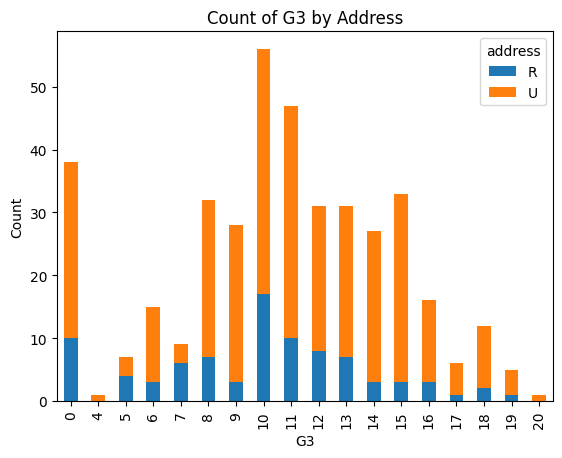

In [ ]:
# Fabian Oppermann
# Doc:
# Parameter:

# Group the data by G3 and address and count the number of students in each group
grouped = df.groupby(['G3', 'address']).size().unstack(fill_value=0)

# Plot the stacked bar chart using pandas
grouped.plot(kind='bar', stacked=True, xlabel='G3', ylabel='Count', title='Count of G3 by Address')

## Ermittle die durchschnittliche Punktzahl aller Schüler, bei denen Mutter und Vater derselben Berufsgruppe angehören, gruppiert nach Berufsgruppe

In [5]:
same_job_students = df[df['Mjob'] == df['Fjob']].groupby(['Mjob', 'Fjob'])
print(same_job_students['G3'].mean())


Mjob      Fjob    
at_home   at_home     12.285714
health    health      13.500000
other     other        9.798077
services  services    10.767442
teacher   teacher     13.083333
Name: G3, dtype: float64


## Ersetze fehlende Werte durch den **Median** der jeweiligen `address`

In [ ]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Calculate the median values for each address group for numeric columns only
median_values = df.groupby('address')[numeric_columns].median()

# Define a function to fill missing values with the median of the respective address
def fill_missing_with_median(row):
    for column in numeric_columns:
        if pd.isnull(row[column]):
            row[column] = median_values.loc[row['address'], column]
    return row

df = df.apply(fill_missing_with_median, axis=1)

0
